# Numerically Solving Schrödinger Equation

In this Python notebook, we will work on finding a purely numerical solution to the time independent Schrödinger Equation (SE). 
$$ -\frac{\hbar^2}{2m}\frac{d^2}{d x^2} \psi(x) + V(x)\psi(x) = E\psi(x)$$

In the process, I hope to convince you, even more than before, that that the SE is indeed an eigen equation.

This notebook can easily be modified for any other potential you would like to try.

## Method
The method we will use here is called the ["Finite Difference Method"](https://en.wikipedia.org/wiki/Finite_difference_method) (see the linked Wikipedia article). In this method we will turn the function $\psi(x)$ into a vector, which is a list in Python, and the operator of the differential equation into a *matrix*. We then end up with a matrix eigenequation, which we can diagonalize to get our answer.

### Discretization
The process of discretization is simply turning our continuous space $x$, into a discrete number of steps, $N$, and our function $\psi(x)$ into an array of size $N$. We thus have $N$ values $x_i$, which have a stepsize $h = \Delta x = x_{i+1} - x_i$. Our choice of the *size* of our space, $N$, turns out to be important. Too large a number will slow down our computation and require too much computer memory, too small a number and the answers we compute will not be sufficiently accurate. A common practice is to start with a small number $N$ and then increase it until the accuracy is acceptable. The actual value you obtain in the end will depend on the problem you are studying. 

### Forward and Backward first order differential
We first need to develop how we will take the derivative of our function. Going back to our introduction to calculus, we remember that the derivative was defined as:
$$
\frac{d}{dx} f(x) = \lim_{\Delta x \rightarrow 0} \frac{f(x+\Delta x) - f(x)}{\Delta x} \approx \frac{f(x+h) - f(x)}{h} + \mathrm{O}(h)
$$
When we take a *finite difference*, we simply not take the limit all the way down to 0, but stop at $\Delta x = h$. Note that for this equation we evaluate the point just *after* $x$, which we call the *forward difference*. If you actually let $\Delta x \rightarrow 0$, then this does not matter, but if you do a finite difference, you can also do:
$$
\frac{d}{dx} f(x) = \lim_{\Delta x \rightarrow 0} \frac{f(x) - f(x-\Delta x)}{\Delta x} \approx \frac{f(x) - f(x-h)}{h} + \mathrm{O}(h)
$$
which is known as the *backward difference*. 

You can also comput a *central difference*, but cannot use steps of $\frac{1}{2}\Delta x$, since that does not exist in our space. The central difference is then a combination of the previous two:
$$
\frac{d}{dx} f(x) = \lim_{\Delta x \rightarrow 0} \frac{f(x+\Delta x) - f(x-\Delta x)}{2\Delta x}\approx \frac{f(x+h) - f(x-h)}{2h} + \mathrm{O}(h^2)
$$
This last one is a little more accurate than the first two.

Note that for any of these approximations to a derivative, we have a problem at the edges of our space. (In Python, C and Java, our space goes from $n=0$ to $n=N-1$, in Fortran $n=1$ to $N$.) Either on one end or the other, there is no $x-\Delta x$ or $x+\Delta x$. Here, we are just not going to worry about this detail.

#### Matrix representation

We now want to turn the equation into a matrix equation for us to evaluate. If you just want to take the derivative of a function stored in an array, then this is not needed, you can run a loop and evaluate the equation for each $x_i$, but if you want to solve a differential equation, we need the matrix.

We introduce the vectors $f(x) = [f_0,f_1,f_2,...,f_{N-1}]$ and for the derivative $f'(x) = [f'_0,f'_1,f'_2...,f'_{N-1}]$. The forward difference derivative can then be written as:
$$ f'_i = (f_{i+1} - f_i)/h $$
And the matrix equation for the forward difference derivative is just:
$$
\begin{pmatrix}f'_0 \\ f'_1 \\\vdots \\ f'_{N-1}\end{pmatrix} = \frac{1}{h}
\begin{pmatrix} -1 & 1 & 0 & & \\ 0 & -1 & 1 & & \\ & & \ddots & \ddots \\
& & & -1 & \end{pmatrix}\begin{pmatrix}f_0 \\ f_1 \\\vdots \\ f_{N-1}\end{pmatrix}
$$
We note that the last entry in the matrix will not be correct because there is no element for $N$. We can fix this up by taking the *backward* derivative at the last point.

We now check that this works. Using Python and Numpy we will take the derivative of $\sin(x)$ and plot the result.

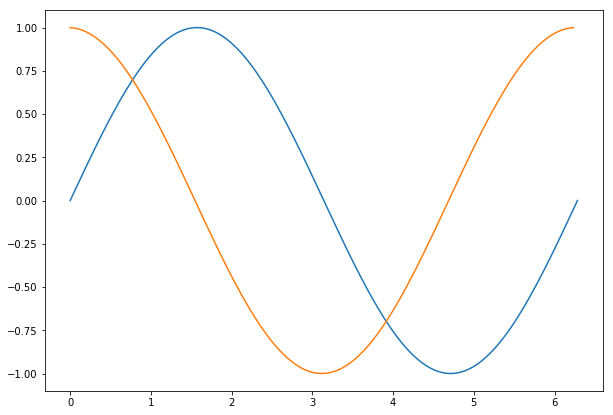

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# Define the number of points in our space, N
N = 128
a = 2*np.pi
# Define the x space from 0 to a with N-1 divisions.
x = np.linspace(0,2*np.pi,N)
# We want to store step size, this is the reliable way:
h = x[1]-x[0] # Should be equal to 2*np.pi/(N-1)
# Compute the function, y = sin(x). With numpy this is easy:
y = np.sin(x)
# We compute the matrix using the np.diag(np.ones(N),0) which creates a 
# diagonal matrix of 1 of NxN size. Multiply by -1 to get -1 diagonal array.
# You get an +1 off-diagonal array of ones, with np.diag(np.ones(N-1),1)
# Note that you need N-1 for an NxN array, since the off diagonal is one smaller.
# Add the two together and normalize by 1/h
Md = 1./h*(np.diag( -1.*np.ones(N),0) + np.diag(np.ones(N-1),1))
# Compute the derivative of y into yp by matrix multiplication:
yp = Md.dot(y)
# Plot the results.
plt.figure(figsize=(10,7))
plt.plot(x,y)
plt.plot(x[:-1],yp[:-1]) # Don't plot last value, which is invalid
plt.show()

## Second order Differential
We can now extend this method to the second order differential. If we take the backward differential of the result of a forward differential, we get:
$$
\frac{d^2}{dx^2}f(x) = \lim_{\Delta x \rightarrow 0} \frac{f'(x)-f'(x-\Delta x)}{\Delta x} =  \lim_{\Delta x \rightarrow 0} \frac{f(x+\Delta x) - f(x) - (f(x) - f(x-\Delta x))}{\Delta x^2} \\
\frac{d^2}{dx^2}f(x) = \lim_{\Delta x \rightarrow 0} \frac{f(x+\Delta x) - 2f(x) + f(x-\Delta x))}{\Delta x^2} \approx \frac{f(x+h) - 2f(x) + f(x-h))}{h^2}
$$
So in the discrete space we can write this as:
$$ f''_i = (f_{i+1} - 2f_i + f_{i-1})/h^2 $$
And finally, as a matrix equation, the second derivative is then:
$$
\begin{pmatrix}f''_0 \\ f''_1 \\ f''_2 \\\vdots \\ f''_{N-1}\end{pmatrix} = \frac{1}{h^2}
\begin{pmatrix} -2 & 1 & 0 & 0 & \\ 1 & -2 & 1 & 0 & \\ 
0& 1 & -2 & 1 &  \\ &  & \ddots & \ddots & \ddots &\\
&  & & 1 & -2 \end{pmatrix}\begin{pmatrix}f_0 \\ f_1 \\ f_2 \\\vdots \\ f_{N-1}\end{pmatrix}
$$
Where now we note that at both ends of our array we will get an inaccurate answer unless we do some fixup. The fixup in this case is to use the same elements as the row below (at the start) or the row above (at the end), so we get $f''_0 = f''_1$ and $f''_{N-1} = f''_{N-2}$, which is not great but better than the alternative.

We can now try this matrix in Python and compute the second derivative of our $y(x)$ array.

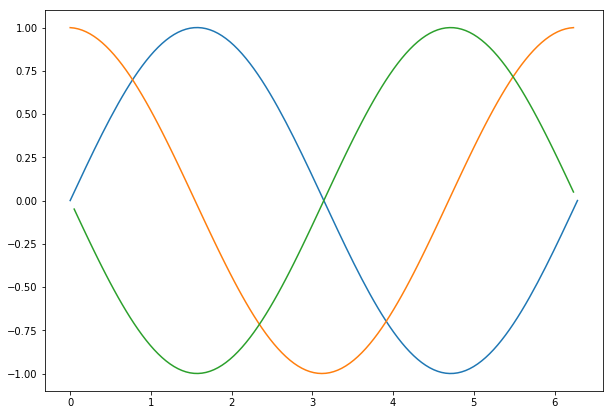

In [15]:
Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) + np.diag( -2.*np.ones(N),0) + np.diag(np.ones(N-1),1))
ypp = Mdd.dot(y)
plt.figure(figsize=(10,7))
plt.plot(x,y)
plt.plot(x[:-1],yp[:-1])     # Last value is invalid, don't plot
plt.plot(x[1:-1],ypp[1:-1])  # First and last value is invalid.
plt.show()

## Solving the Schrödinger Equation

We can now setup the Schrodinger Equation as a matrix equation:
$$
H = \frac{\hbar^2}{2m}\frac{d^2}{d x^2} + V \\
H \psi(x) = E \psi(x)
$$
We now know the matrix for taking the second order derivative. The matrix for the potential is simply the values of the potential on the diagonal of the matrix: $M_{i=j} = V_i$. 

### Infinite Square Well
The very simplest system to solve for is the infinite square well, for which $V=0$. We will readily recognize the results as alternating $\cos(x)$ and $\sin(x)$ functions, and the energy levels are:
$$
E_i = \frac{n^2\pi^2\hbar^2}{2ma^2}
$$.
First, we need to discuss a subtlety. The Infinite Square Well from $-a/2$ to $a/2$ has $V=\infty$ *at* these points. We get into trouble trying to entery $\infty$ in our potential, so what we need to do is just limit the coputational space from $-a/2+h$ to $a/2-h$, where $h$ is our step size. That way we force the wavefunction to zero at the end points. 
We compute this in the next box. I create $x_{full}$ as the full x-axis from $-a/2$ to $a/2$, but take $N+2$ steps. I then leave out the first and last point when calculating the wavefunctions. At the end, before plotting, I add a zero to the beginning and end of the wavefunctions, so that we get the expected result for plotting.

Note I again import everything and setup all the definitions, so this block is stand-alone, and can be copy-pasted into another notebook.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as scl
hbar=1
m=1
N = 1024
a = 1.0
x_full = np.linspace(-a/2.,a/2.,N+2)
x = x_full[1:-1] # Eliminate first and last point.
# We want to store step size, this is the reliable way:
h = x[1]-x[0] # Should be equal to 2*np.pi/(N-1)
V = np.zeros(N)
Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
H = -(hbar*hbar)/(2.0*m)*Mdd - np.diag(V) 
E,psiT = np.linalg.eigh(H) # This computes the eigen values and eigenvectors
if psiT[N/2,0]<0: # Wrong order, and sign is negative, flip order and sign.
    psi = -np.transpose(psiT) 
else:  # The eigen vectors are in the "wrong" order, swap x,y
    psi = np.transpose(psiT)
    # We now have the eigen vectors as psi(i), where i is the energy level.
# Extend the arrays with a zero at the start and end.
psi=np.insert(psi,0,0.,axis=1)           # Insert a column of 0. at the start
psi=np.insert(psi,len(psi[0]),0.,axis=1) # Insert a column of 0. at the end.
    
print np.sum(psi[0]*psi[0])  # Check. Yes these are normalized already.
# print psiT[0] # Uncomment to see the values printed for Psi_0

1.0


We now want to plot these wavefunctions.

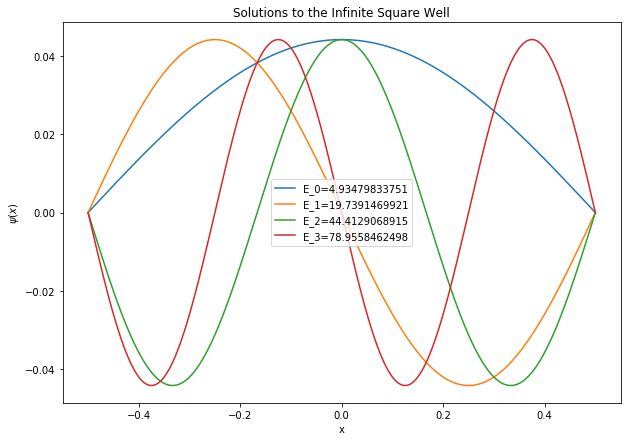

In [17]:
plt.figure(figsize=(10,7))
for i in range(4):
    plt.plot(x_full,psi[i],label="E_{}={}".format(i,E[i]))
    plt.legend()
    plt.title("Solutions to the Infinite Square Well")
    plt.xlabel("x")
    plt.ylabel("$\psi(x)$")
plt.show()

We now also want to check that the energy levels do indeed correspond to the known levels:
$$
E_n = \frac{n^2 \pi^2 \hbar^2}{2 m a^2}
$$

In [18]:
for i in range(5):
    n = i+1
    print "E[{}] = {:9.4f}, E_{} ={:9.4f}".format(n,E[i],n, n*n*np.pi**2*hbar*hbar/(2*m*a*a))

E[1] =    4.9348, E_1 =   4.9348
E[2] =   19.7391, E_2 =  19.7392
E[3] =   44.4129, E_3 =  44.4132
E[4] =   78.9558, E_4 =  78.9568
E[5] =  123.3676, E_5 = 123.3701
